In [ ]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from skspatial.objects import Line, Points

In [54]:

#extracting all the points of the channel mouth
#calculating the centroid of each four points

filename_1 = "7DTC_transformed.pdb"
filename_2 = "7WF3_transformed.pdb"

with open(filename_1) as pdb_structure:
    lines = pdb_structure.readlines()

first_segment = list()
second_segment = list()
third_segment = list()
fourth_segment = list()

allCA = list()

for line in lines:
    line = line[:22] + ' ' + line[22:]
    # print(line)

    if len(line.split()) > 5:
        residue_num = int(line.split()[5])
    else:
        break

    if 'CA' in line:
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = [x,y,z]
        allCA.append(data)

    if 381 <= residue_num <= 426 and ('CA' in line):
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = (x,y,z)
        first_segment.append(data)

    if 896 <= residue_num <= 941 and ('CA' in line):
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = (x,y,z)
        second_segment.append(data)

    if 1436 <= residue_num <= 1480 and ('CA' in line):
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = (x,y,z)
        third_segment.append(data)

    if 1731 <= residue_num <= 1776 and ('CA' in line):
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = (x,y,z)
        fourth_segment.append(data)

print(first_segment)

allCA = np.array(allCA)

ATOM      1  N   PRO A  119     112.879  89.691 171.960  1.00146.02           N  

ATOM      2  CA  PRO A  119     112.686  90.891 172.784  1.00146.02           C  

ATOM      3  C   PRO A  119     112.595  92.162 171.945  1.00146.02           C  

ATOM      4  O   PRO A  119     112.018  92.136 170.858  1.00146.02           O  

ATOM      5  CB  PRO A  119     113.932  90.912 173.679  1.00146.02           C  

ATOM      6  CG  PRO A  119     114.925  90.032 172.993  1.00146.02           C  

ATOM      7  CD  PRO A  119     114.125  88.983 172.296  1.00146.02           C  

ATOM      8  N   ILE A  120     113.155  93.265 172.452  1.00146.65           N  

ATOM      9  CA  ILE A  120     113.167  94.521 171.703  1.00146.65           C  

ATOM     10  C   ILE A  120     114.348  94.622 170.752  1.00146.65           C  

ATOM     11  O   ILE A  120     114.598  95.705 170.206  1.00146.65           O  

ATOM     12  CB  ILE A  120     113.173  95.740 172.648  1.00146.65           C  

ATOM

In [76]:

centroids = []
x_values = []
y_values = []
z_values = []
for a, b, c, d in zip (first_segment, second_segment, third_segment, fourth_segment):
    x_centroid = (a[0] + b[0] + c[0] + d[0])/4
    y_centroid = (a[1] + b[1] + c[1] + d[1])/4
    z_centroid = (a[2] + b[2] + c[2] + d[2])/4
    x_values.append(x_centroid)
    y_values.append(y_centroid)
    z_values.append(z_centroid)
    data = (x_centroid, y_centroid, z_centroid)
    centroids.append(data)
centroids = np.array(centroids)
# print(centroids)
centroids = centroids[14:] # chop off the first few which don't fall in line

In [120]:
# from sklearn.linear_model import LinearRegression

# xy = centroids[:,0:2]
# print(xy[:5])
# z = centroids[:,2]
# print()
# print(z[:5])
# reg = LinearRegression().fit(xy, z)
# print(reg.score(xy, z))
# print(reg.coef_)
# print(reg.intercept_)

# x_max = max(allCA[:,0])
# x_min = min(allCA[:,0])
# y_max = max(allCA[:,1])
# y_min = min(allCA[:,1])

# xy_line = np.array(list(zip(np.linspace(x_min, x_max, 200), np.linspace(y_max, y_min, 200))))
# z_line = reg.coef_[0]*xy_line[:,0] + reg.coef_[1]*xy_line[:,1] + reg.intercept_

points = Points(centroids)
line_fit = Line.best_fit(points)

line_points = list()

for t in np.linspace(-100,100,500):
    line_points.append(line_fit.to_point(t))

line_points = np.array(line_points)

print(line_points)

[[206.44997026 176.73494633 187.09848511]
 [206.23402258 176.46967064 186.8895896 ]
 [206.0180749  176.20439495 186.6806941 ]
 ...
 [ 99.12397349  44.89292764  83.27741881]
 [ 98.90802581  44.62765194  83.0685233 ]
 [ 98.69207813  44.36237625  82.85962779]]


C:\Users\Mark\AppData\Local\Temp\ipykernel_14616\165233670.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


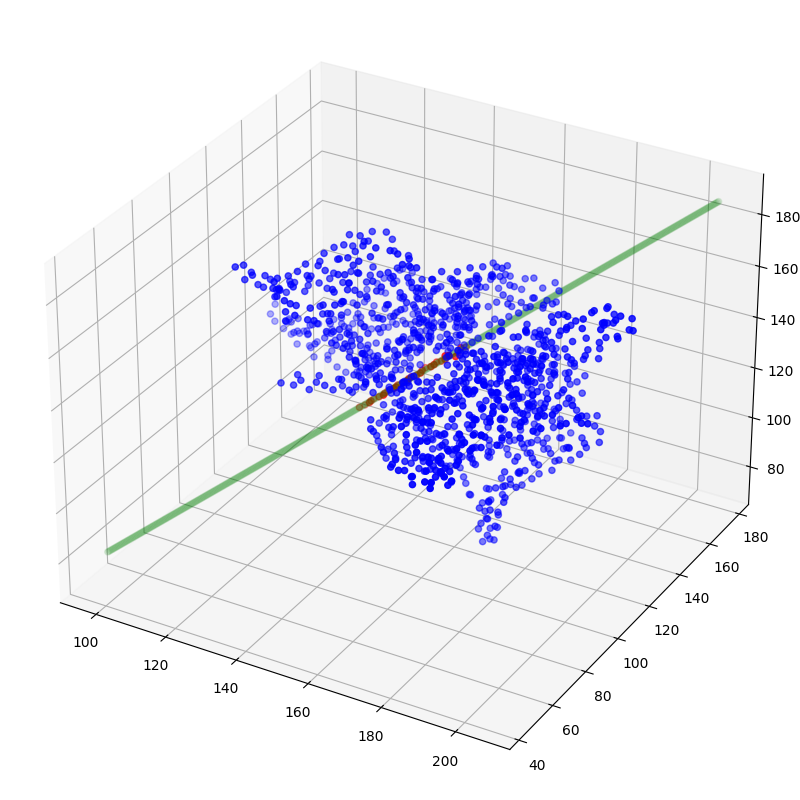

In [125]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c = 'r', marker='o')
ax.scatter(allCA[:,0], allCA[:,1], allCA[:,2], c = 'b', marker='o')
ax.scatter(line_points[:,0], line_points[:,1], line_points[:,2], c = 'g', alpha=0.1)
ax.set_label(['x','y','z'])
plt.show()
